In [7]:
import sys
sys.path.append(r'C:\Users\CRAIB_LAB\Introduction detection system\code-xNIDS')  # Adding the path  using Windows


In [1]:
# Load the test datasets
import pandas as pd
X_test = pd.read_csv('../X_test_cnn.csv')
Y_test = pd.read_csv('../y_test_cat.csv')



In [2]:
print(X_test.shape)
print(X_test.columns.tolist())


(938254, 7)
['-5.781778642590309492e-01', '6.910161686261422076e-02', '2.893754224213817006e-01', '-5.401049496665382144e-01', '9.999997868381725885e-01', '-9.999997868381725885e-01', '0.000000000000000000e+00']


In [2]:
from tensorflow.keras.models import load_model

# Load your trained model 

model = load_model('../IDS1_model.h5')
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 6, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,953 (230.29 KB)

 Trainable params: 58,567 (228.78 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2 (12.00 B)

In [6]:
import sys
import os

# Print the current working directory to check the folder structure
print(os.getcwd())

# Append the path to the xNIDS folder
sys.path.append(os.path.join(os.getcwd(), 'code-xNIDS'))



C:\Users\CRAIB_LAB\Introduction detection system\code-xNIDS


In [3]:
import sys
import os

# Print current working directory to verify
print("Current Working Directory:", os.getcwd())

# Add the Scripts folder to the Python path
sys.path.append(r'C:\Users\CRAIB_LAB\Introduction detection system\code-xNIDS\Scripts')

# Verify the path has been added
print("Python Path:", sys.path)


Current Working Directory: C:\Users\CRAIB_LAB\Introduction detection system\code-xNIDS
Python Path: ['C:\\Users\\CRAIB_LAB\\miniconda3\\python312.zip', 'C:\\Users\\CRAIB_LAB\\miniconda3\\DLLs', 'C:\\Users\\CRAIB_LAB\\miniconda3\\Lib', 'C:\\Users\\CRAIB_LAB\\miniconda3', '', 'C:\\Users\\CRAIB_LAB\\miniconda3\\Lib\\site-packages', 'C:\\Users\\CRAIB_LAB\\miniconda3\\Lib\\site-packages\\win32', 'C:\\Users\\CRAIB_LAB\\miniconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\CRAIB_LAB\\miniconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\CRAIB_LAB\\Introduction detection system\\code-xNIDS\\Scripts']


In [4]:
import sys
print(sys.executable)


C:\Users\CRAIB_LAB\miniconda3\python.exe


In [2]:
import sys
print(sys.executable)


C:\Users\CRAIB_LAB\miniconda3\python.exe


In [4]:
import asgl


In [71]:
import numpy as np
import random

# Map the integer labels back to the attack names using the label mapping
attack_label_mapping = {
    0: "Send fake command",
    1: "Moving Two files",
    2: "Exploit ms08 netapi",
    3: "CnC uploading exe",
    4: "Characterization",
    5: "Least Significant bit exfiltration"
}

# Randomize the sample index each time
sample_index = random.randint(0, len(X_test) - 1)  # Randomly pick an index from 0 to len(X_test)-1

# Pick a random sample from X_test
current_sample = X_test.iloc[sample_index].values.reshape(1, -1)

# Make a prediction with the CNN model
prediction = model.predict(current_sample)
predicted_label = prediction.argmax(axis=1)  # Getting the class with highest probability

# Get the true label from Y_test (one-hot encoded)
true_label = Y_test.iloc[sample_index].argmax(axis=0)  # Extract true label (index of '1')

# Map the predicted and true labels to attack names
predicted_attack_name = attack_label_mapping[predicted_label[0]]
true_attack_name = attack_label_mapping[true_label]

# Print the results
print(f"Predicted Attack: {predicted_attack_name}")
print(f"True Attack: {true_attack_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Attack: CnC uploading exe
True Attack: CnC uploading exe


Current sample shape: (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step



===== Prediction Results =====
Raw prediction (probabilities): [[5.3351747e-17 1.0163077e-16 4.2929097e-23 9.9955231e-01 3.4863442e-16
  4.4765239e-04 1.7342142e-08]]
Predicted class: 3 - CnC uploading exe
Prediction confidence (probability): 0.9996

===== Finding a proper input =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Found proper input: [[[ 0.09314966]
  [ 0.06910162]
  [ 1.46510042]
  [ 0.19255428]
  [-1.00000021]
  [ 1.00000021]
  [ 0.        ]]]

===== Performing weighted sampling =====
Weighted samples shape: (5, 7)
First 5 weighted samples: [[0.         0.         0.         0.19255428 0.         0.
  0.        ]
 [0.         0.         1.46510042 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.00000021
  0.        ]
 [0.         0.         1.46510042 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.19255428 0.         0.
  0.        ]]
Scaled weighted samples: [[ 0.          0.         -0.81649658  1.22474487  0.         -0.5
   0.        ]
 [ 0.          0.          1.22474487 -0.81649658  0.         -0.5
   0.        ]
 [ 0.          0.         -0.81649658 -0.81649658  0.          2.
   0.        ]
 [ 0.          0.          1.22474487 -0.81649658  0.         -0.5
   0.        ]
 [ 0.          0.         -0.8164965

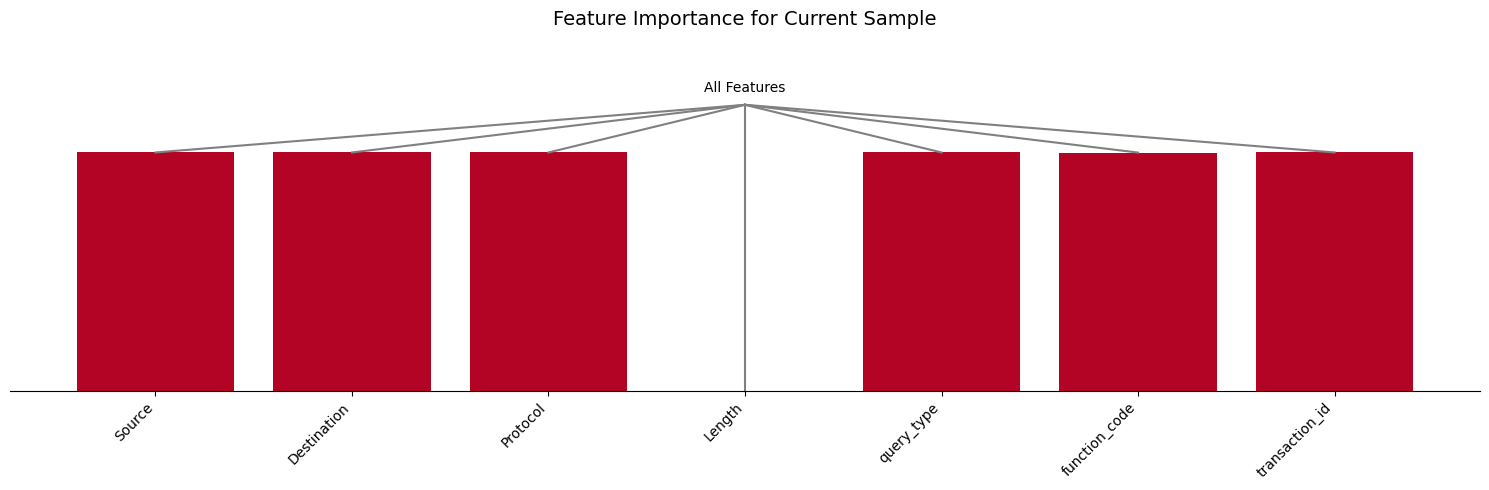

In [33]:
# 1. Imports
from explanation import Explanation
import numpy as np
from tensorflow import keras
import pandas as pd

# 2. Attack label mapping
attack_label_mapping = {
    0: "Send fake command",
    1: "Moving Two files",
    2: "Exploit ms08 netapi",
    3: "CnC uploading exe",
    4: "Characterization",
    5: "Least Significant bit exfiltration"
}

# 3. Feature names (final mapping based on your dataset)
feature_cols = [
    'Source',
    'Destination',
    'Protocol',
    'Length',
    'query_type',
    'function_code',
    'transaction_id'
]

# 4. Load test data and define the sample for explanation
X_test = pd.read_csv('../X_test_cnn.csv')  # Ensure this file exists and is loaded correctly
sample_index = 0  # Choose a sample index for prediction
current_sample = X_test.iloc[sample_index].values.reshape(1, -1)  # Reshape for the model

# Print the shape of the current sample to ensure it's correct
print(f"Current sample shape: {current_sample.shape}")

# 5. Load the trained model and make a prediction
model = keras.models.load_model('../IDS1_model.h5')  # Path to your saved model
prediction = model.predict(current_sample)  # Get the raw prediction from the model

# Print the prediction to understand its structure
print("\n===== Prediction Results =====")
print(f"Raw prediction (probabilities): {prediction}")

# 6. Extract predicted class and confidence
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class label
predicted_confidence = prediction[0][predicted_class]  # Get the confidence/probability for the predicted class

# Get human-readable class name
predicted_class_name = attack_label_mapping.get(predicted_class, "Unknown Class")

# Print prediction details
print(f"Predicted class: {predicted_class} - {predicted_class_name}")
print(f"Prediction confidence (probability): {predicted_confidence:.4f}")

# 7. Create the Explanation object and perform explanation
explainer = Explanation(
    current_sample=current_sample,
    histo_samples=X_test.values,
    model_path='../IDS1_model.h5',  # Path to your saved model
    original_score=predicted_confidence,  # Use confidence score or original prediction score
    feature_names=feature_cols,  # Using clean final feature names
    group_sizes=[len(feature_cols)],
    target=predicted_class  # Pass the predicted class as target
)

# 8. Find a proper input
print("\n===== Finding a proper input =====")
new_input = explainer.search_proper_input()
print(f"Found proper input: {new_input}")

# 9. Perform weighted sampling
print("\n===== Performing weighted sampling =====")
explainer.weighted_sampling(num_samples=5)

# Check weighted samples before proceeding to regression
print("Weighted samples shape:", explainer.weighted_samples.shape)
print("First 5 weighted samples:", explainer.weighted_samples[:5])

# 10. Apply updated Sparse Group Lasso
print("\n===== Applying Sparse Group Lasso =====")
explainer.sparse_group_lasso()

# Print coefficients after applying Lasso
print(f"Computed coefficients: {explainer.coef}")

# 11. Visualize feature importance (now with real feature names)
print("\n===== Visualizing Feature Importance =====")
explainer.visualization(
    group_sizes=[len(feature_cols)],
    group_names=["All Features"],
    feature_names=feature_cols
)
